,Review,Entities,Sentiment,Compound Score
0,I absolutely love this Apple iPhone! It's fast and the camera is amazing.,"[(Apple, ORG)]",Positive,0.8620
1,This Samsung TV stopped working after two weeks. Very disappointed.,"[(Samsung TV, ORG)]",Negative,-0.6478
2,The Nike shoes are comfortable and stylish. Will buy again!,"[(Nike, ORG)]",Positive,0.5562
3,Terrible experience with Lenovo laptop. It crashes every hour.,"[(Lenovo, ORG)]",Negative,-0.4767
4,Sony headphones are top-notch. Great sound quality!,"[(Sony, ORG)]",Positive,0.6588
5,Avoid the Huawei tablet. It’s slow and full of bugs.,"[(Huawei, ORG)]",Negative,-0.2960
6,Bought a JBL speaker. Great bass and battery life.,"[(JBL, ORG)]",Positive,0.6249
7,Dell monitor works fine but the colors are washed out.,[],Positive,0.1027
8,My ASUS laptop overheats a lot. Not recommended.,"[(ASUS, ORG)]",Negative,-0.1511
9,Adidas sneakers are perfect for running. Super light and comfy.,[],Positive,0.8225


/tmp/ipython-input-4-3240904600.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


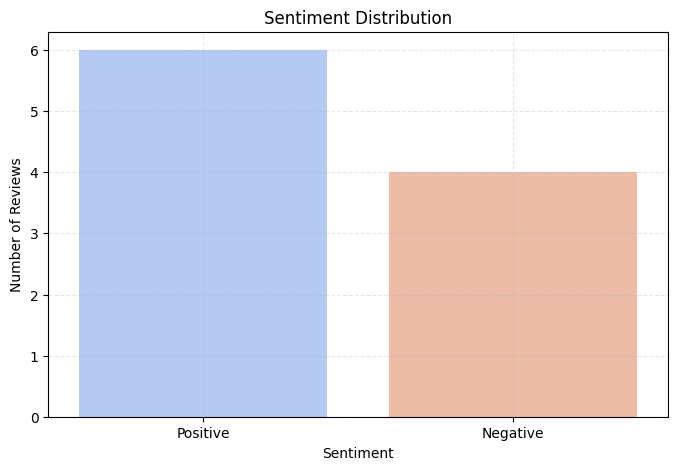

In [4]:
# !pip install spacy vaderSentiment matplotlib seaborn
# !python -m spacy download en_core_web_sm

import spacy
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()

reviews = [
    "I absolutely love this Apple iPhone! It's fast and the camera is amazing.",
    "This Samsung TV stopped working after two weeks. Very disappointed.",
    "The Nike shoes are comfortable and stylish. Will buy again!",
    "Terrible experience with Lenovo laptop. It crashes every hour.",
    "Sony headphones are top-notch. Great sound quality!",
    "Avoid the Huawei tablet. It’s slow and full of bugs.",
    "Bought a JBL speaker. Great bass and battery life.",
    "Dell monitor works fine but the colors are washed out.",
    "My ASUS laptop overheats a lot. Not recommended.",
    "Adidas sneakers are perfect for running. Super light and comfy."
]

def analyze_review(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['ORG', 'PRODUCT']]
    score = analyzer.polarity_scores(text)['compound']
    sentiment = "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"
    return {
        "Review": text,
        "Entities": entities,
        "Sentiment": sentiment,
        "Compound Score": score
    }

results = [analyze_review(review) for review in reviews]
df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
display(df[['Review', 'Entities', 'Sentiment', 'Compound Score']])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

df.to_csv("review_analysis_output.csv", index=False)
